# Statistics for data science / analytics

# Plotting histograms

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data=len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins=np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins=n_bins.astype('int')

# Plot the histogram
_=plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

# Cumulative Distribution Function

### also study PDF, PMF

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [ ]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_=plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_=plt.xlabel('Range')
_=plt.ylabel('ECDF')


# Display the plot
plt.show()


# Mean and median

In [ ]:
np.mean(series)

np.median(series)

# Computing percentiles

In [ ]:
# Specify array of percentiles: percentiles
percentiles= np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers=np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

# Variance and Standard deviation

In [ ]:
# Compute the variance: variance
variance=np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

# Variance and Covariance

### np.cov(xy) is the input format for calculating the coveriance
### The output is a 2D matrix of whose [1,0] and the [0,1] index values represent the covariance and [0,0] and [1,1] are variances of x and y respectively. 
o/p=[[varianceX, covariance],
    [covariance, varianceY]]

In [ ]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix= np.cov(versicolor_petal_length,versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov= covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


# Pearson corelation coefficient 

### Pearson corr coeff is a measure of relation between two entities, lies between -1 and +1
### np.corrcoef(x,y) returns a 2D matrix with [0,0] and [1,1] filled with 1 and pearson coeff in [0,1] index position

In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: 
r=pearson_r(versicolor_petal_length,versicolor_petal_width)


# Print the result
print(r)

# Checking randomness of the random module

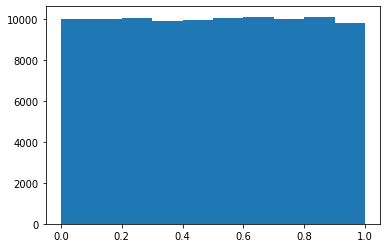

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

# Bernoulli

### bernoulli- when there are r successful trials out of n total with a p probability of success

# Bernoulli trials using the random module

In [ ]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+= 1
    return n_success

# Very good example of bank loan defaults

In [ ]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

In [ ]:
# Compute ECDF: x, y
x,y= ecdf(n_defaults)

# Plot the ECDF with labeled axes
_=plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('defaults')
_=plt.ylabel('percentages')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money=np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


## Using the inbuilt bernoulli func from random

In [ ]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults=np.random.binomial(100,0.05,size=10000)

# Compute CDF: x, y
x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('defauts')
plt.ylabel('percentages')

# Show the plot
plt.show()


# Poisson distribution

## Poisson process- when the next event is completely independent of the timing of the previous event

### Poisson- the number r of arrival of a poisson process in a given amount of time with an avg rate of?

### It is like a binomial distribution for low success and large no of trials

# When we have rare events (low p, high n), the Binomial distribution is Poisson. 

In [ ]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson=np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


# Normal distribution PDF and CDF

## PDF

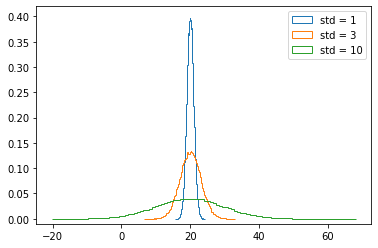

In [18]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1=np.random.normal(20,1,size=100000)  # np.random.normal(mean, std, size)
samples_std3=np.random.normal(20,3,size=100000)
samples_std10=np.random.normal(20,10,size=100000)

# Make histograms
plt.hist(samples_std1,bins=100, normed=True, histtype='step')  # use normed or density, both correct
plt.hist(samples_std3,bins=100, density=True, histtype='step')
plt.hist(samples_std10,bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

### we are taking the example of a belmont race of horses with their times stored as an array, cal. probability of beating fastest time

In [7]:
belmont_no_outliers= np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

## CDF

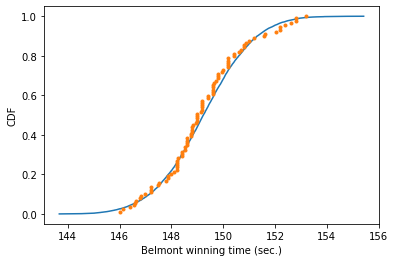

In [8]:
# Compute mean and standard deviation: mu, sigma
mu=np.mean(belmont_no_outliers)
sigma=np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu,sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor= ecdf(samples)
x,y =ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


## prob of beating fastest

In [9]:
# Take a million samples out of the Normal distribution: samples
samples=np.random.normal(mu,sigma,size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob=np.sum(samples<=144)/1000000

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000594


# Exponential distribution for 2 independent events (poisson events)

## exponential distribution describes waiting time between rare events

In [ ]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

In [ ]:
# Draw samples of waiting times: waiting_times
waiting_times= successive_poisson(764,715, 100000)  # 764- no of games after no-hit happens
                                                    #15- hit cycle happens

# Make the histogram
_=plt.hist(waiting_times, histtype='step', normed=True, bins=100)


# Label axes
_=plt.xlabel('no-hits+cycle')
_=plt.ylabel('prob')


# Show the plot
plt.show()
